# 문서 유사도 (Document Similarity)

In [1]:
import string
import nltk
from nltk.stem import WordNetLemmatizer 

In [2]:
import os, glob
import pandas as pd

path = 'C:\\SKN_19\\07_nlp\\01_text_analysis\\data\\OpinosisDataset1.0\\topics'

all_files = glob.glob(os.path.join(path, '*.data'))

filename_list = []
opinion_list = []

for file_ in all_files:
    df = pd.read_table(file_, header=None, index_col=None, encoding='latin1')
    # "C:\\SKN_19\\07_nlp\\01_text_analysis\\data\\OpinosisDataset1.0\\topics\\accuracy_garmin_nuvi_255W_gps.txt.data"

    filename = file_.split('\\')[-1]
    filename = filename.split('.')[0]
    filename_list.append(filename)

    opinions = df.to_string(index=False, header=False)
    opinion_list.append(opinions)

In [3]:
document_df = pd.DataFrame({
    'filename': filename_list,
    'opinions': opinion_list 
})

document_df

,filename,opinions
0,accuracy_garmin_nuvi_255W_gps,...
1,bathroom_bestwestern_hotel_sfo,...
2,battery-life_amazon_kindle,...
3,battery-life_ipod_nano_8gb,...
4,battery-life_netbook_1005ha,...
5,buttons_amazon_kindle,...
6,comfort_honda_accord_2008,...
7,comfort_toyota_camry_2007,...
8,directions_garmin_nuvi_255W_gps,...
9,display_garmin_nuvi_255W_gps,...


In [4]:
from string import punctuation

def lemmatize(text):
    """
    문자열을 소문자로 변환하고, 문장 부호를 제거한 후
    토큰화하여 각 단어의 동사(verb) 형태의 어근(lemmatize)으로 변환합니다.
    
    주요 처리 단계:
    1. text.lower(): 입력 문자열 전체를 소문자로 변환합니다.
    2. punc_rem_dict: string.punctuation에 포함된 모든 문장 부호 문자에 대해
       ord 함수(문자를 유니코드 정수값으로 변환)를 사용해 딕셔너리를 만듭니다.
       (예: ord('!') → 33, ord('.') → 46 등)
       이런 식으로 만들어진 딕셔너리는 translate 메서드에서 각 문장 부호 문자를 모두 삭제하는 역할을 합니다.
    3. text.translate(punc_rem_dict): 위 딕셔너리로 text에서 해당 문자 제거.
    4. nltk.word_tokenize(text): 텍스트를 단어 단위로 분리(토큰화)합니다.
    5. WordNetLemmatizer().lemmatize(token, pos='v'): 각 토큰을 동사로 간주하여 어근 추출.
    
    최종적으로 어근화된 단어 리스트를 반환합니다.
    """
    # 1. 소문자 변환
    text = text.lower()
    
    # 2. 문장 부호 제거: ord(ch)는 문자를 아스키코드(또는 유니코드) 정수로 변환
    punc_rem_dict = dict((ord(ch), None) for ch in punctuation)
    text = text.translate(punc_rem_dict)

    # 3. 단어 토큰화
    tokens = nltk.word_tokenize(text)

    # 4. 어근화(lemmatization)
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token, pos='v') for token in tokens]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    tokenizer=lemmatize,
    stop_words='english',
    ngram_range=(1, 2),
    max_df=0.85,
    min_df=0.05
)

# 문서 벡터화
opinions_vecs = tfidf_vectorizer.fit_transform(document_df['opinions'])

c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  warnings.warn(


In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, max_iter=5000, random_state=0)
document_df['cluster'] = kmeans.fit_predict(opinions_vecs)
document_df

Exception in thread Thread-126 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\Playdata\anaconda3\envs\ml_env\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\ipykernel\ipkernel.py", line 772, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\Playdata\anaconda3\envs\ml_env\Lib\threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\Playdata\anaconda3\envs\ml_env\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc0 in position 4: invalid start byte


,filename,opinions,cluster
0,accuracy_garmin_nuvi_255W_gps,...,2
1,bathroom_bestwestern_hotel_sfo,...,1
2,battery-life_amazon_kindle,...,0
3,battery-life_ipod_nano_8gb,...,2
4,battery-life_netbook_1005ha,...,2
5,buttons_amazon_kindle,...,0
6,comfort_honda_accord_2008,...,3
7,comfort_toyota_camry_2007,...,3
8,directions_garmin_nuvi_255W_gps,...,2
9,display_garmin_nuvi_255W_gps,...,2


In [ ]:
# 호텔 관련 리뷰를 기준 리뷰로 선정
hotel_idx = document_df[document_df['cluster'] == 1].index
print(hotel_idx.shape)
print(hotel_idx)

(15,)
Index([1, 13, 14, 15, 20, 21, 24, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')


In [ ]:
# 첫번째 리뷰를 기준 리뷰로 선정
base_idx = 1
document_df.iloc[base_idx]

filename                       bathroom_bestwestern_hotel_sfo
opinions                                                  ...
cluster                                                     1
Name: 1, dtype: object

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# 기준 리뷰와 모든 리뷰의 코사인 유사도 계산
opinions_sim = cosine_similarity(opinions_vecs[base_idx], opinions_vecs)
opinions_sim

array([[0.00748211, 1.        , 0.00929825, 0.0057907 , 0.00951122,
        0.01189862, 0.04207734, 0.05068772, 0.00883856, 0.00840561,
        0.01333684, 0.0118808 , 0.01204711, 0.04527121, 0.05728026,
        0.06248841, 0.00753869, 0.02152493, 0.01696471, 0.02047214,
        0.06173425, 0.06124276, 0.00748295, 0.00877269, 0.04074639,
        0.01315832, 0.0105536 , 0.0222888 , 0.11626805, 0.00537765,
        0.41683399, 0.36028138, 0.51119681, 0.00799792, 0.01306653,
        0.01888393, 0.02248538, 0.01884263, 0.11499329, 0.15210166,
        0.1506946 , 0.04685638, 0.00708347, 0.00407049, 0.0150326 ,
        0.09851446, 0.08026128, 0.00684375, 0.00568624, 0.00898582,
        0.0080185 ]])

In [ ]:
# 유사도 높은 순으로 정렬
opinions_sorted_idx = opinions_sim.argsort()[:,::-1]  # 내림차순 저렬 (유사도 높은순)
opinions_sorted_idx = opinions_sorted_idx[:, 1:]      # 자기자신 제외
opinions_sorted_idx = opinions_sorted_idx.reshape(-1) # 1차원 벡터로 변환

# 유사도가 높은순으로 정렬된 파일명 조회
result_df = document_df.iloc[opinions_sorted_idx][['filename', 'cluster']]
opinions_sim = opinions_sim.reshape(-1)
result_df['similarity'] = opinions_sim[opinions_sorted_idx]
result_df

,filename,cluster,similarity
32,room_holiday_inn_london,1,0.511197
30,rooms_bestwestern_hotel_sfo,1,0.416834
31,rooms_swissotel_chicago,1,0.360281
39,service_holiday_inn_london,1,0.152102
40,service_swissotel_hotel_chicago,1,0.150695
28,price_holiday_inn_london,0,0.116268
38,service_bestwestern_hotel_sfo,1,0.114993
45,staff_bestwestern_hotel_sfo,1,0.098514
46,staff_swissotel_chicago,1,0.080261
15,free_bestwestern_hotel_sfo,1,0.062488


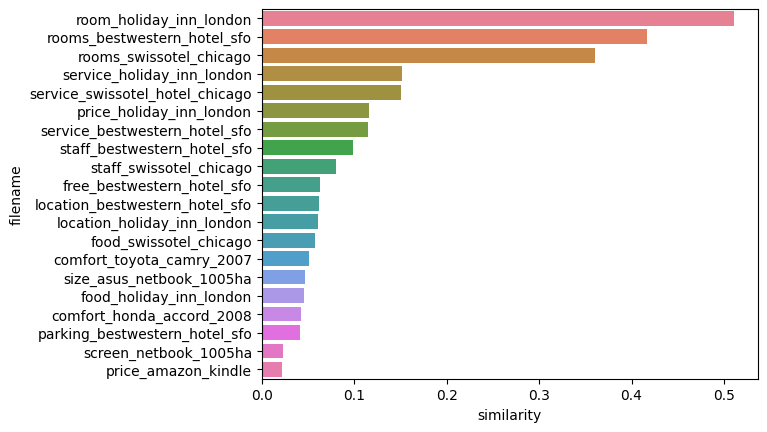

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='similarity', y='filename', data=result_df.iloc[:20], hue='filename')
plt.show()